In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

house = pd.read_csv("housing.csv")

In [ ]:
house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

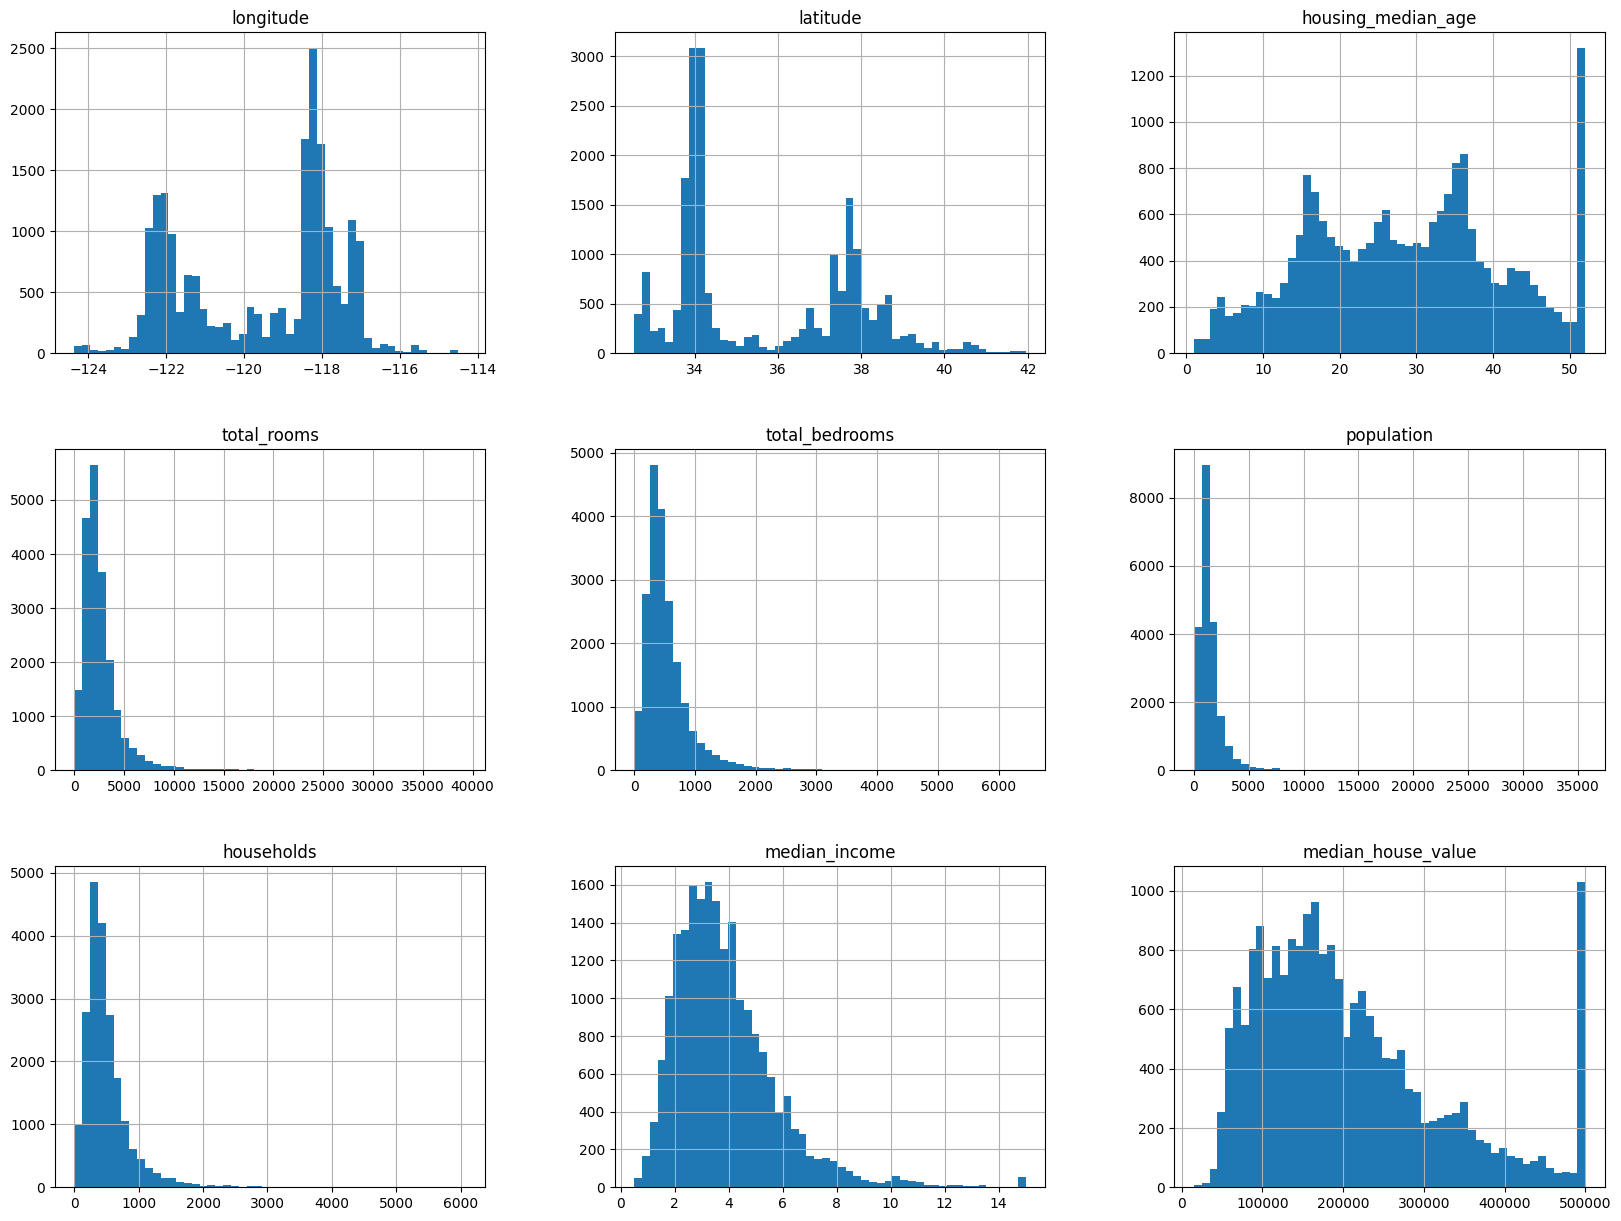

In [ ]:
house.hist(bins=50, figsize=(20, 15))

<Axes: xlabel='longitude', ylabel='latitude'>

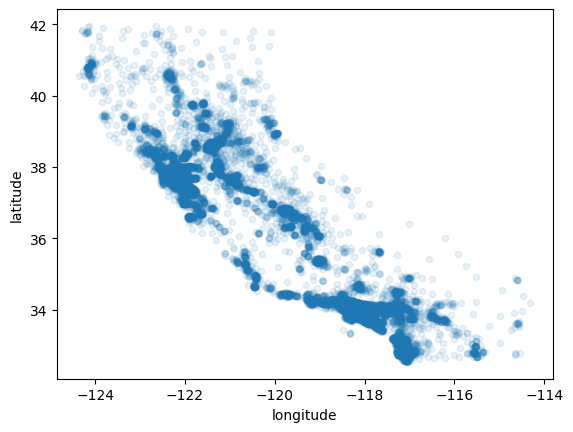

In [ ]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

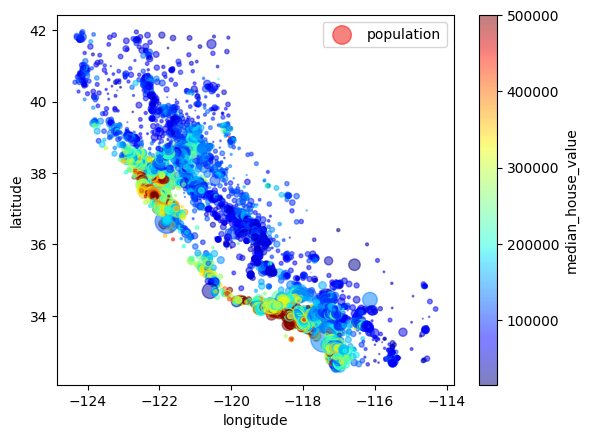

In [ ]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
             s=house["population"] / 100, label='population',
             c="median_house_value", cmap=plt.get_cmap('jet'),
            colorbar=True
)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

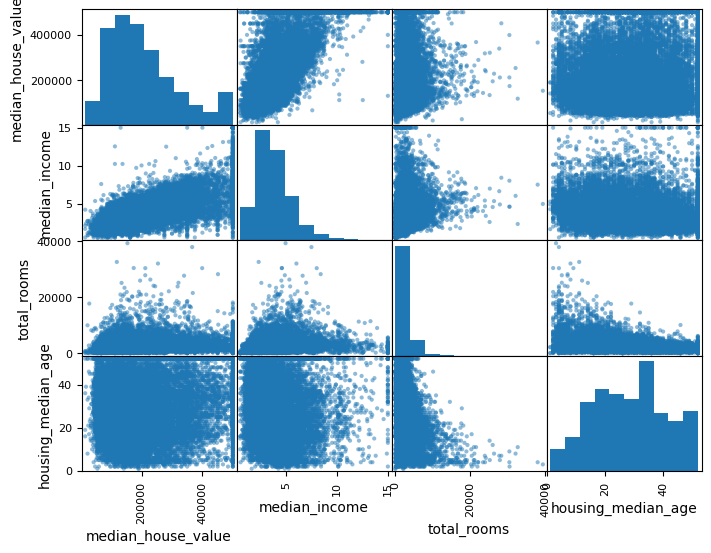

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(house[attributes], figsize=(8, 6))

<Axes: xlabel='median_income', ylabel='median_house_value'>

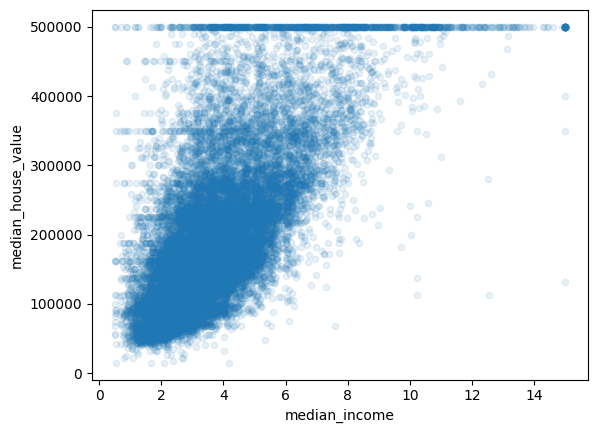

In [ ]:
house.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
house["rooms_per_household"] = house["total_rooms"] / house["households"]
house["bedrooms_per_room"] = house["total_bedrooms"] / house["total_rooms"]
house["population_per_household"] = house["population"] / house["households"]

In [ ]:
corr_matrix = house.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-12-faa909dbc5d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

***Drop all not related columns***

In [ ]:
house.drop("population_per_household", axis=1, inplace=True)

***Splitting the dataset***

In [ ]:
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(house, test_size=0.2, random_state=42)

In [ ]:
house["income_cat"] = pd.cut(house["median_income"], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

<Axes: >

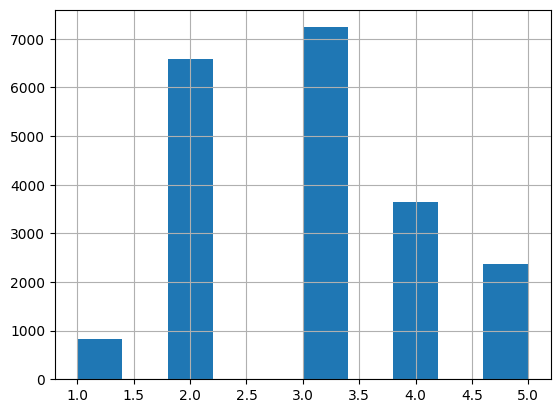

In [ ]:
house["income_cat"].hist()

***In this dataset, stratified sampling would be better***

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(house, house["income_cat"]):
  strat_train_set = house.iloc[train_index]
  strat_test_set = house.iloc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

***Drop the label column***

In [ ]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

<ipython-input-19-2ee77cf96522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop("income_cat", axis=1, inplace=True)
<ipython-input-19-2ee77cf96522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop("income_cat", axis=1, inplace=True)


In [ ]:
strat_test_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,6.715625,0.156972
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,7.137809,0.151980
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,5.283636,0.185822
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,5.491694,0.196612
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,6.154723,0.162477


In [ ]:
train = strat_train_set.drop("median_house_value", axis=1)
train_labels = strat_train_set["median_house_value"].copy()

test = strat_test_set.drop("median_house_value", axis=1)
test_labels = strat_test_set["median_house_value"].copy()

num_std_attribs = ['housing_median_age', 'total_rooms', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population', 'households', 'total_bedrooms']
num_maxmin_attribs = ['longitude', "latitude"]
cat_attribs = ["ocean_proximity"]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#Numerical Features
numeric_std_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                  ('stdscaler', StandardScaler())])

numeric_minmax_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                    ('minmaxscaler', MinMaxScaler())])

#Categorical Features
cat_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [ ]:
from sklearn.compose import ColumnTransformer

full_transformer = ColumnTransformer([('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attribs),
                                ('numeric_minmaxpreprocessing', numeric_minmax_pipeline, num_maxmin_attribs),
                                 ('cat_preprocessing', cat_pipeline, cat_attribs)
                                ])

In [ ]:
from sklearn.linear_model import LinearRegression

p1_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('linear_regression', LinearRegression())
                      ])

In [ ]:
#For regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print("Training Error MAE: " + str(mean_absolute_error(train_preds, train_labels)))
  print("Test Error MAE: " + str(mean_absolute_error(test_preds, test_labels)))
  print("R2 score: " + str(r2_score(test_preds, test_labels)))

In [ ]:
fit_and_print(p1_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 49056.08123137331
Test Error MAE: 48958.70220686146
R2 score: 0.478781223533012


***Polynomial Regression***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

num_attribs = num_std_attribs + num_maxmin_attribs

#Polynomial Features
poly_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('poly_features', PolynomialFeatures(degree=2, include_bias=False))
                          ])

In [ ]:
from sklearn.compose import ColumnTransformer

full_transformer_poly = ColumnTransformer([ ('poly_features', poly_pipeline, num_attribs),
                                            ('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attribs),
                                            ('numeric_minmaxpreprocessing', numeric_minmax_pipeline, num_maxmin_attribs),
                                            ('cat_preprocessing', cat_pipeline, cat_attribs)
                                         ])

In [ ]:
from sklearn.linear_model import LinearRegression

p2_full_pipeline = Pipeline([('all_column_transformation_poly', full_transformer_poly),
                        ('linear_regression', LinearRegression())
                      ])

In [ ]:
p2_full_pipeline

Pipeline(steps=[('all_column_transformation_poly',
                 ColumnTransformer(transformers=[('poly_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_features',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population', 'households',
                                                   'total_bedr...
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population', 'households',
                                                   'total_bedrooms']),
                                                 ('numeric_minmaxpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude']),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
fit_and_print(p2_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 44208.72539176515
Test Error MAE: 44213.05913243887
R2 score: 0.5961623675073056


In [ ]:
from sklearn.linear_model import SGDRegressor

p3_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty=None))
                      ])

In [ ]:
fit_and_print(p3_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 49753.741274749504
Test Error MAE: 50050.24991524199
R2 score: 0.4243940668789542


***Ridge***

In [ ]:
p4_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty='l2', eta0=0.1))
                      ])

In [ ]:
fit_and_print(p4_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 49594.65990966474
Test Error MAE: 49639.69087168098
R2 score: 0.4672583457296148


***Lasso***

In [ ]:
p5_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty='l1'))
                      ])

In [ ]:
fit_and_print(p5_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 49313.41642818002
Test Error MAE: 49417.50789953348
R2 score: 0.4657274856735779


***ElasticNet***

In [ ]:
from sklearn.linear_model import ElasticNet

p6_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('elastic_regression', ElasticNet(alpha=0.1, l1_ratio=0.5))
                      ])

In [ ]:
fit_and_print(p6_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 50542.77304304735
Test Error MAE: 50610.60649149872
R2 score: 0.35124940615259626


***Decision Tree Regressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

p7_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('decision_regression', DecisionTreeRegressor())
                      ])

In [ ]:
fit_and_print(p7_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 0.0
Test Error MAE: 43799.142199612405
R2 score: 0.6468977461557199


***KNeighbors Regressor***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

p8_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('KN_regression', KNeighborsRegressor())
                          ])

In [ ]:
fit_and_print(p8_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 36027.868156492244
Test Error MAE: 43915.462984496124
R2 score: 0.5763141713489073


***Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

p9_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('RF_regression', RandomForestRegressor())
                          ])

In [ ]:
fit_and_print(p9_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 11918.467533914727
Test Error MAE: 31640.070552325582
R2 score: 0.7786824070314464


***Best model is Random Forest Regressor***

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = [
              {'RF_regression__n_estimators': [10, 50, 100],
              'RF_regression__max_depth': [5, 10, 20],
              'RF_regression__min_samples_split': [2, 4, 6],
              'RF_regression__min_samples_leaf': [1, 2, 4]}
            ]

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=p9_full_pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [ ]:
# Perform the grid search
grid_search.fit(train, train_labels)

In [ ]:
# Best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'RF_regression__max_depth': 5, 'RF_regression__min_samples_leaf': 1, 'RF_regression__min_samples_split': 2, 'RF_regression__n_estimators': 10}


In [ ]:
p10_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('RF_regression', RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50))
                          ])

fit_and_print(p10_full_pipeline, train, train_labels, test, test_labels)

Training Error MAE: 31438.43117394294
Test Error MAE: 36044.799980719436
R2 score: 0.7136895884248846
